# Mapping Remote Sensing Data

In [1]:
import pandas as pd
import numpy as np
from cartopy import crs as ccrs
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16, 'figure.figsize': [12, 6]})

In [2]:
fires = pd.read_csv("../data/VIIRSNDE_global2018312.v1.0.txt")
fires.head()

Lon        Lat  Mask  Conf  brt_t13(K)    frp(MW)  line  sample  Sat  \
0  27.110006  30.769241     8    52  302.877533   5.814295   242    1735  NDE   
1  26.083252  30.534357     9   100  332.959717  24.340988   301    1620  NDE   
2  34.865997  28.162659     8    38  301.165985   6.107953   396    2589  NDE   
3  34.872623  28.161121     8    71  307.277985   9.287819   396    2590  NDE   
4  34.865070  28.158880     8    39  301.227783   6.001442   402    2590  NDE   

   YearDay  Hour  
0  2018312     1  
1  2018312     1  
2  2018312     1  
3  2018312     1  
4  2018312     1

In [3]:
fig = plt.figure(figsize=[20,20])
ax = plt.subplot(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
plt.scatter(fires['Lon'], fires['Lat'])
plt.show()

/Users/justinreid/mambaforge/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/justinreid/mambaforge/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


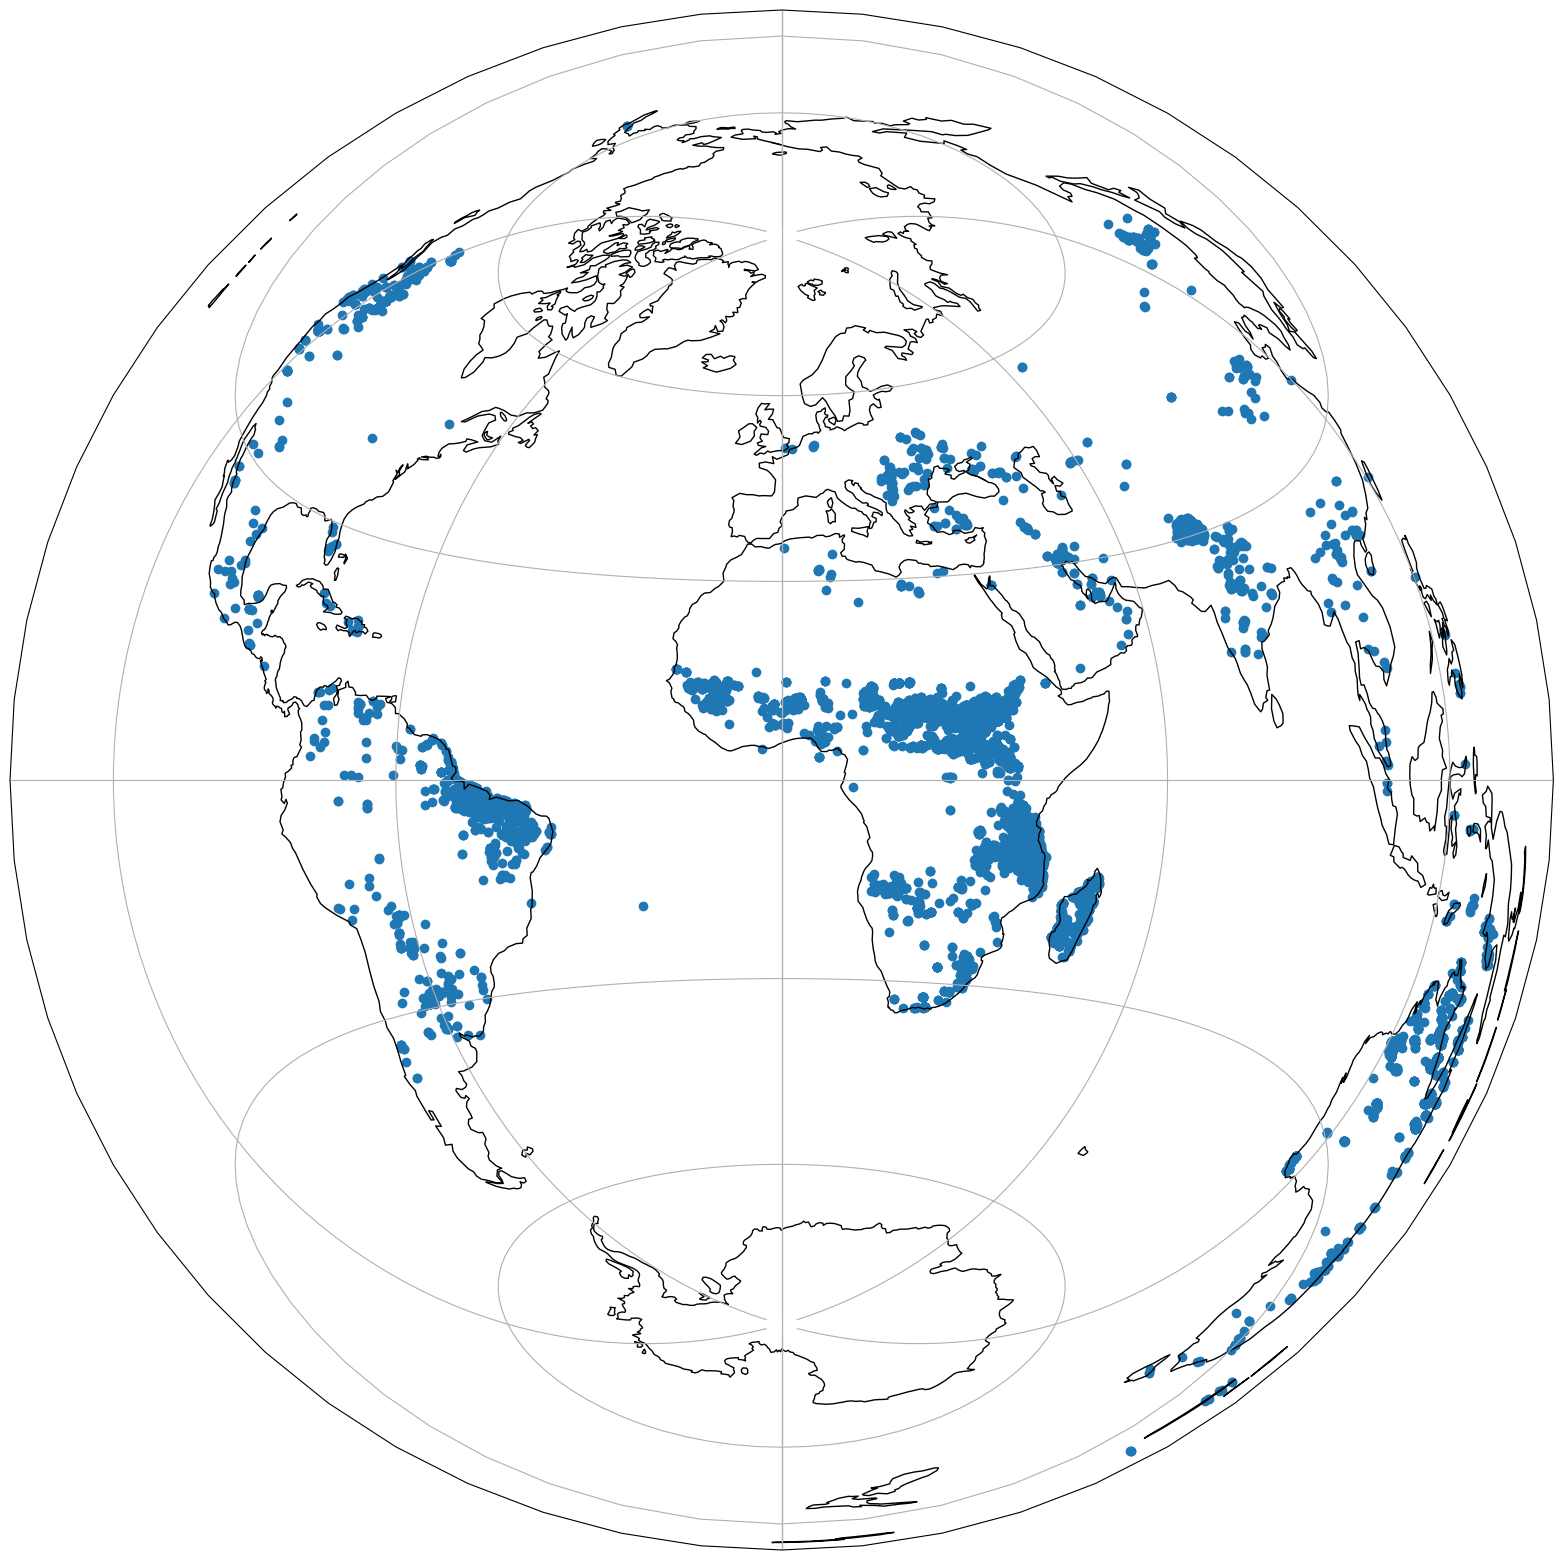

In [4]:
fig = plt.figure(figsize=[20, 20])
ax = plt.subplot(projection=ccrs.LambertAzimuthalEqualArea())
ax.coastlines()
ax.gridlines()
ax.set_global()
plt.scatter(fires['Lon'], fires['Lat'], transform=ccrs.PlateCarree())
plt.show()

In [5]:
extent = [-125, -120, 38, 44]

In [6]:
to_proj = ccrs.PlateCarree()
from_proj = ccrs.PlateCarree()

In [7]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import ticker

In [8]:
lonLabels = np.arange(-180, 180, 1.5)
latLabels = np.arange(-90, 90, 1)

/Users/justinreid/mambaforge/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


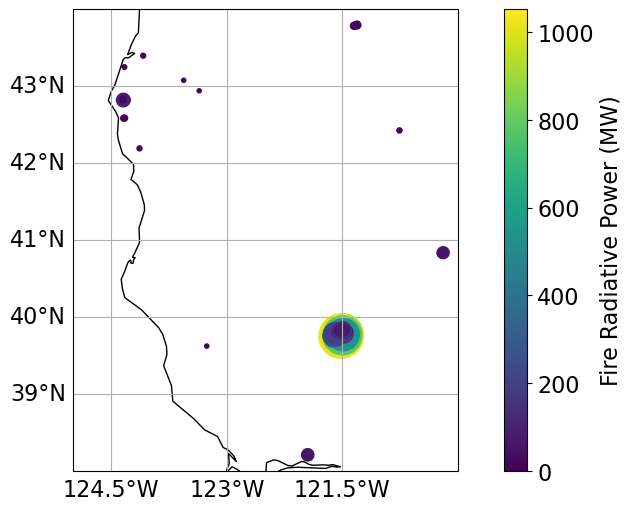

In [9]:
fig = plt.figure()
ax = plt.subplot(projection=to_proj)
ax.coastlines('50m')
ax.set_extent(extent)

plt.scatter(fires['Lon'], fires['Lat'], c=fires['frp(MW)'], s=fires['frp(MW)'], transform=ccrs.PlateCarree())

cbar = plt.colorbar()
cbar.set_label("Fire Radiative Power (MW)")

#1. Map the gridlines to the variable gl
gl = ax.gridlines(crs=to_proj, draw_labels=True)

#2. Add two attributes to gl, which are xlocator and ylocator
gl.xlocator = ticker.FixedLocator(lonLabels)
gl.ylocator = ticker.FixedLocator(latLabels)

#3. Changes labesl to show degrees North/South & East West
gl.xformatter = LONGITUDE_FORMATTER
gl.yformmatter = LATITUDE_FORMATTER

#Remove labest from top and right side (optional)
gl.top_labels = False
gl.right_labels = False

plt.show()

In [10]:
from netCDF4 import Dataset

fname = '../data/aod/JRR-AOD_v1r1_npp_s201808091955538_e201808091957180_c201808092049460_thinned.nc'
file_id = Dataset(fname)

In [11]:
file_id.variables.keys()

dict_keys(['Latitude', 'Longitude', 'AOD550', 'QCAll'])

In [12]:
print(file_id.variables['AOD550'].shape, file_id.variables['Longitude'].shape, file_id.variables['Latitude'].shape)

(768, 3200) (768, 3200) (768, 3200)


In [13]:
aod = file_id.variables['AOD550'][:,:]
lon = file_id.variables['Longitude'][:,:]
lat = file_id.variables['Latitude'][:,:]

In [14]:
print(file_id.variables['AOD550'].valid_range)

[-0.05  5.  ]


In [15]:
levs = np.arange(0, 1.8, 0.1)
levs

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7])

In [16]:
fig = plt.figure(figsize=[12, 12])
ax = plt.subplot(projection=ccrs.PlateCarree())

ax.coastlines('50m')
extent = [-125, -120, 38, 44]
ax.set_extent(extent)

x1 = ax.contourf(lon, lat, aod, levs, extend='both')

fig.colorbar(x1, extend='both', orientation="horizontal", fraction=0.05)

#Adds the active fire scatter plot on top
ax.scatter(fires['Lon'], fires['Lat'], color='red', s=50)

plt.show()

In [17]:
quality_flag = file_id.variables['QCAll'][:,:]

In [18]:
maskHQ = (quality_flag != 0)
aodHQ = np.ma.masked_where(maskHQ, aod)

In [19]:
(aod.count() - aodHQ.count()) / aod.count()

0.33269544384282035

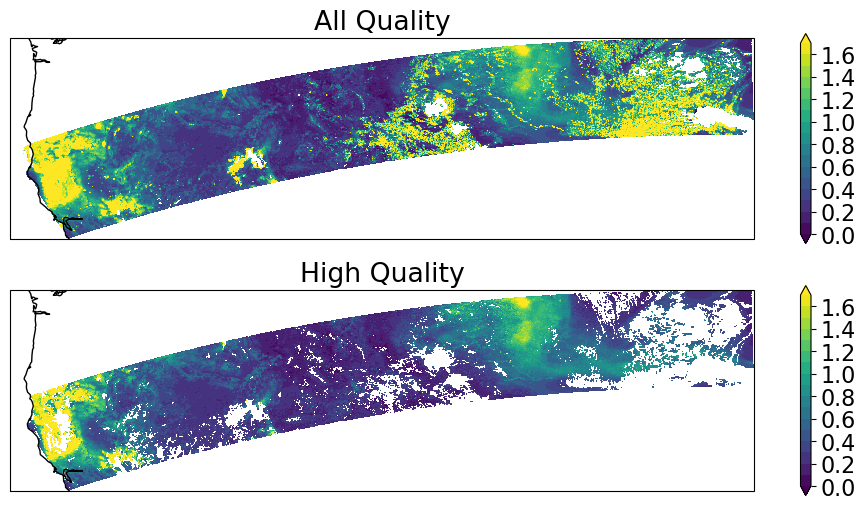

In [20]:
#Top Plot

fig = plt.figure()
upper_axis = plt.subplot(2,1,1, projection=ccrs.PlateCarree())
upper_axis.set_title("All Quality")
upper_axis.coastlines('50m')

upper_fig = upper_axis.contourf(lon, lat, aod, levs, extend='both')
fig.colorbar(upper_fig, ax=upper_axis, extend='both')

#Lower Plot
lower_axis = plt.subplot(2,1,2, projection=ccrs.PlateCarree())
lower_axis.set_title("High Quality")
lower_axis.coastlines('50m')

lower_fig = lower_axis.contourf(lon, lat, aodHQ, levs, extend='both')
fig.colorbar(lower_fig, ax=lower_axis, extend='both')

plt.show()

In [21]:
import numpy.ma as ma
import xarray as xr

In [22]:
fname = '../data/RDEFT4_20200131.nc'
ice = xr.open_dataset(fname)

In [23]:
print(ice)

<xarray.Dataset>
Dimensions:            (y: 448, x: 304)
Dimensions without coordinates: y, x
Data variables:
    sea_ice_thickness  (y, x) float32 ...
    snow_depth         (y, x) float32 ...
    snow_density       (y, x) float32 ...
    lat                (y, x) float32 ...
    lon                (y, x) float32 ...
    freeboard          (y, x) float32 ...
    roughness          (y, x) float32 ...
    ice_con            (y, x) float32 ...
Attributes:
    Title:        CryoSat-2 sea ice thickness and ancillary data
    Abstract:     This data set contains monthly averaged Arctic sea ice thic...
    Projection:   CryoSat-2 elevation data have a nominal footprint size of 3...
    Institution:  NASA Goddard Space Flight Center
    PI_name:      For questions related to this data set please contact the P...
    References:   A description of the primary methodology used in the retrie...


In [24]:
print(ice['sea_ice_thickness'])

<xarray.DataArray 'sea_ice_thickness' (y: 448, x: 304)>
[136192 values with dtype=float32]
Dimensions without coordinates: y, x
Attributes:
    units:      Meters
    long_name:  Sea ice thickness


In [25]:
ice['sea_ice_thickness'].mean()

<xarray.DataArray 'sea_ice_thickness' ()>
array(-9044.761, dtype=float32)

In [26]:
ice['sea_ice_thickness'].min()

<xarray.DataArray 'sea_ice_thickness' ()>
array(-9999., dtype=float32)

In [27]:
ice_masked = ice.where(ice['sea_ice_thickness'] != -9999.0)

In [28]:
to_proj = ccrs.NorthPolarStereo()
from_proj = ccrs.PlateCarree()

In [29]:
plt.figure(figsize=[10, 10])
ax = plt.subplot(projection=to_proj)
ax.coastlines('50m')
ax.gridlines()

ice_plot = ax.pcolormesh(ice['lon'], ice['lat'], ice_masked['sea_ice_thickness'], transform=from_proj)
plt.colorbar(ice_plot)
ax.set_extent([-180, 180, 60, 90], crs=from_proj)
plt.show()

/Users/justinreid/mambaforge/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/justinreid/mambaforge/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


In [33]:
fname = '../data/goes-meso/michael/OR_ABI-L1b-RadM1-M3C13_G16_s20182822019282_e20182822019350_c20182822019384.nc'
file_id = Dataset(fname)
list(file_id.variables)

['Rad',
 'DQF',
 't',
 'y',
 'x',
 'time_bounds',
 'goes_imager_projection',
 'y_image',
 'y_image_bounds',
 'x_image',
 'x_image_bounds',
 'nominal_satellite_subpoint_lat',
 'nominal_satellite_subpoint_lon',
 'nominal_satellite_height',
 'geospatial_lat_lon_extent',
 'yaw_flip_flag',
 'band_id',
 'band_wavelength',
 'esun',
 'kappa0',
 'planck_fk1',
 'planck_fk2',
 'planck_bc1',
 'planck_bc2',
 'valid_pixel_count',
 'missing_pixel_count',
 'saturated_pixel_count',
 'undersaturated_pixel_count',
 'min_radiance_value_of_valid_pixels',
 'max_radiance_value_of_valid_pixels',
 'mean_radiance_value_of_valid_pixels',
 'std_dev_radiance_value_of_valid_pixels',
 'percent_uncorrectable_L0_errors',
 'earth_sun_distance_anomaly_in_AU',
 'algorithm_dynamic_input_data_container',
 'processing_parm_version_container',
 'algorithm_product_version_container',
 't_star_look',
 'band_wavelength_star_look',
 'star_id']

In [34]:
file_id.variables['x'][0:10], file_id.variables['y'][0:10]

(masked_array(data=[-0.04424 , -0.044184, -0.044128, -0.044072, -0.044016,
                    -0.04396 , -0.043904, -0.043848, -0.043792, -0.043736],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 masked_array(data=[0.08848   , 0.088424  , 0.08836801, 0.088312  ,
                    0.088256  , 0.0882    , 0.088144  , 0.08808801,
                    0.088032  , 0.087976  ],
              mask=False,
        fill_value=1e+20,
             dtype=float32))

In [35]:
proj_var = file_id.variables['goes_imager_projection']
print(proj_var)

<class 'netCDF4._netCDF4.Variable'>
int32 goes_imager_projection()
    long_name: GOES-R ABI fixed grid projection
    grid_mapping_name: geostationary
    perspective_point_height: 35786023.0
    semi_major_axis: 6378137.0
    semi_minor_axis: 6356752.31414
    inverse_flattening: 298.2572221
    latitude_of_projection_origin: 0.0
    longitude_of_projection_origin: -75.0
    sweep_angle_axis: x
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


In [40]:
# Define the satellite height and central longitude for plots
# This can vary based on geostationary satellite

sat_height = proj_var.perspective_point_height
central_lon = proj_var.longitude_of_projection_origin

In [37]:
#Define the Globe projection
semi_major = proj_var.semi_major_axis
semi_minor = proj_var.semi_minor_axis

globe = ccrs.Globe(semimajor_axis=semi_major, semiminor_axis=semi_minor)

In [41]:
central_lon = proj_var.longitude_of_projection_origin
crs = ccrs.Geostationary(central_longitude=central_lon, satellite_height=sat_height, globe=globe)

In [44]:
# Mutliply the x, y, coordinated by satellite height to get the pixel position
X = file_id.variables['x'][:] * sat_height
Y = file_id.variables['y'][:] * sat_height
imgExtent = (X.min(), X.max(), Y.min(), Y.max())

/Users/justinreid/mambaforge/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/justinreid/mambaforge/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/justinreid/mambaforge/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


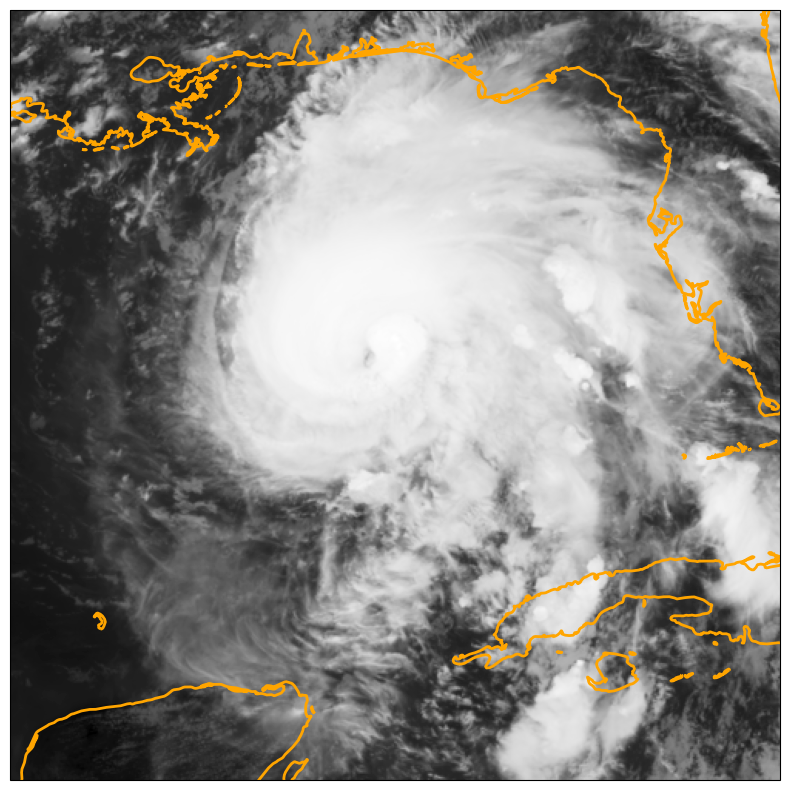

In [45]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=crs)
ax.coastlines('10m', color='orange', linewidth=2)
ax.imshow(file_id.variables['Rad'], origin='upper', cmap='gray_r', extent=imgExtent)
plt.show()